# What is Corner?

A corner is a point whose local neighbourhood stands in two dominant and different edge directions.
or
A corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness.

We will look at some popular algorithms:

1. Harris Corner Detection
    The basic intution is that corners can be detected by looking for significant chanfe in all directions.
    
2. Shi-Tomasi Corner Detection 
    It made a small modification to the Harris Corner Detection which ended up with better results.
    it changes the scoring function selection criteria that Harris uses for corner detection.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flat_chess = cv2.imread("C:\\Users\\JERRY\\Downloads\\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

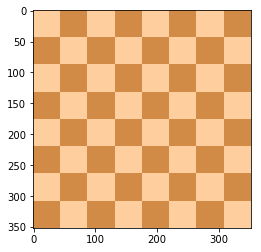

In [3]:
plt.imshow(flat_chess)

We can consider each of the chess box has a corner and we are going to detect it...

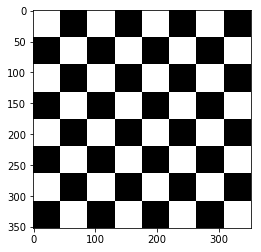

In [4]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,'gray')

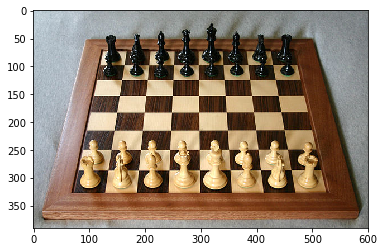

In [5]:
real_chess = cv2.imread("C:\\Users\\JERRY\\Downloads\\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

for real image is probably going to be a little bi t harder to define corners , because of the angle , 3d structure and corner detection can be miss calculated to chess pieces it self...

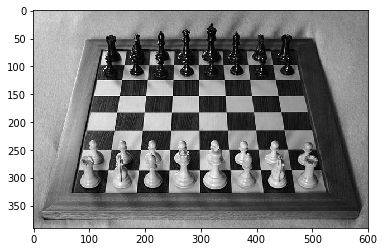

In [6]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,'gray')

# Now lets apply the corner detection method on both the images:

In [7]:
gray_flat_chess    # it hase integer values and we need floating point values for the methods...

array([[197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197]], dtype=uint8)

In [8]:
gray = np.float32(gray_flat_chess)
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

# Harris Corner Detection method:

In [9]:
# cornerHarris(src, blockSize, ksize, k[, dst[, borderType]])
# blocksize is the neighbourhood size
# ksize is an apparture parameter for sobel operattor

dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04 )  # These are the default value we are using, we can play arounf them accorfiding to requirement.

Now the result of it is dilated for marking the corners.. dilate operation is just a morphological operation...

In [10]:
dst = cv2.dilate(dst,None)

There is a threshold for an optimal value, it may vary depending on the image...

In [11]:
flat_chess[dst > 0.01*dst.max()] = [255,0,0] #RGB  # basically its looking for 1 % of the max value

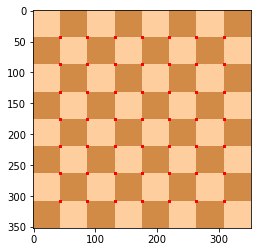

In [12]:
plt.imshow(flat_chess)

# Now lets try this on the real chess board :


In [13]:
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src = gray,blockSize = 2,ksize = 3,k=0.04)   # These are the default value we are using, we can play arounf them accorfiding to requirement.

In [14]:
dst= cv2.dilate(dst,None)

In [15]:
real_chess[dst>0.01*dst.max()] =  [255,0,0]

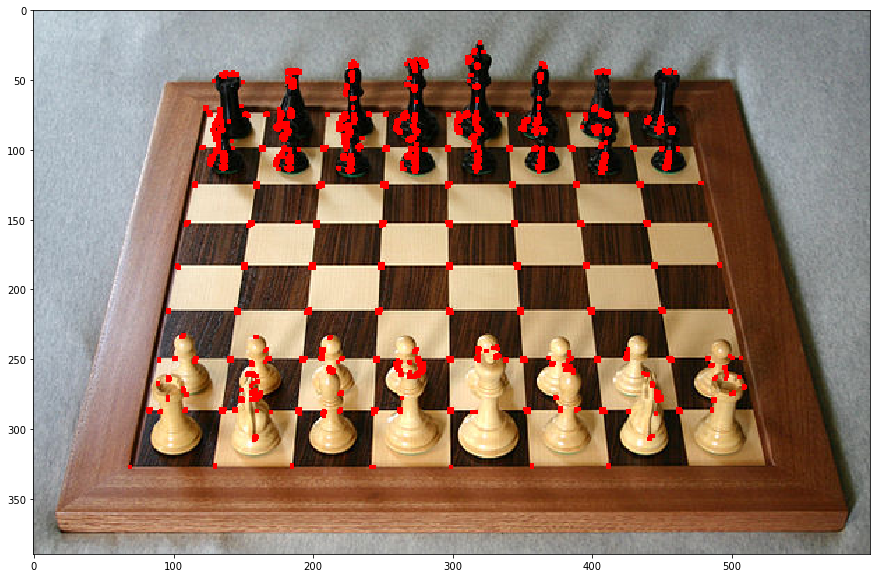

In [17]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(real_chess)

As we can see , this method has recorded lot of corners on the actual pieces as well.

# Shi-Tomashi Corner Detection method:

cv2.goodFeaturesToTrack()  the name of the funciton for this method

In [19]:
real_chess = cv2.imread("C:\\Users\\JERRY\\Downloads\\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread("C:\\Users\\JERRY\\Downloads\\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

In [27]:
#goodFeaturesToTrack(image, maxCorners, qualityLevel(minimum eigen value(0.01 default)), minDistance(10 default)[, corners[, mask[, blockSize[, useHarrisDetector[, k]]]]])
# if we dont want the limit on max corneres it shows, we can provide -1 as value and it finds all the corners.

# max coners is something at which we can play around accorfing to our requirements....

corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)

#### The downside of using this method is , it does not automatically mark down the corner it finds... we need to assign it for making circle at where it finds corners...

In [34]:
# corners

right now corners has the floating point values and we want them to be integers...

In [32]:
corners =np.int0(corners)
# corners

we need to flatten out the array....

In [30]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

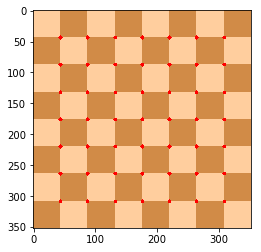

In [31]:
plt.imshow(flat_chess)

### Now let's try to run this on the real image and see how it performs:

In [44]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,120,0.01,10)

In [45]:
corners =np.int0(corners)

In [46]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)

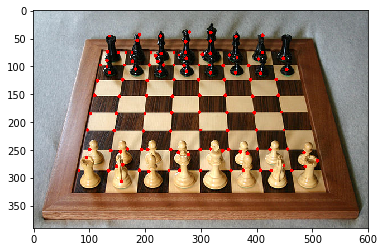

In [47]:
plt.imshow(real_chess)